# DIABETES PREDICTION MODEL

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# LOAD DATASET

In [2]:
df=pd.read_csv("C:\\Users\\Administrator\\Desktop\\diabetes2.csv")

# EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

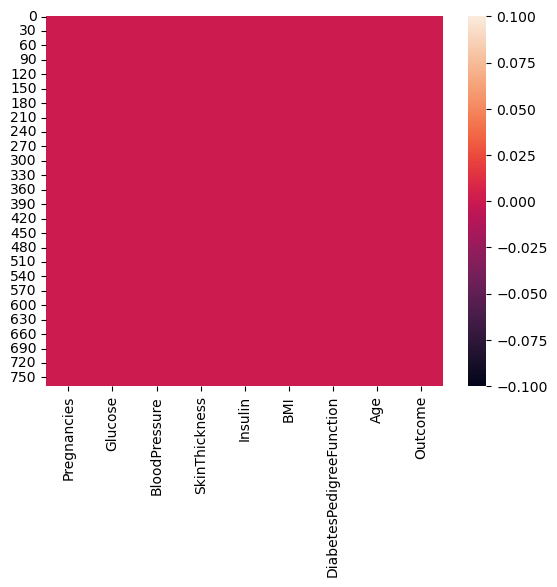

In [5]:
sns.heatmap(df.isnull())

<AxesSubplot:>

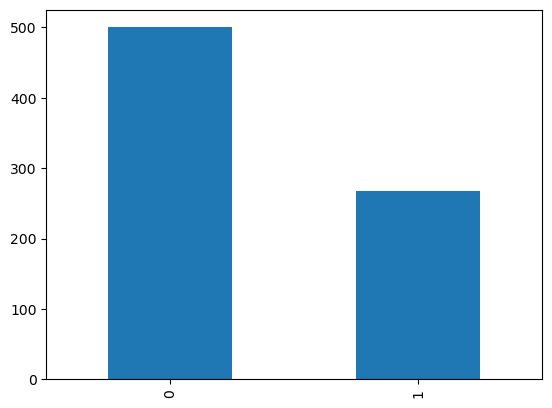

In [6]:
df.Outcome.value_counts().plot(kind='bar')

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

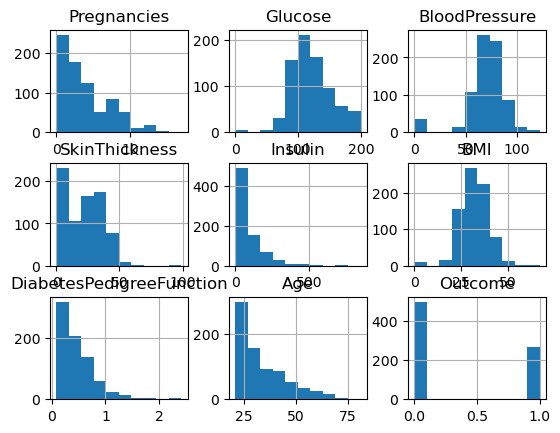

In [9]:
df.hist()

# let's see how data is distributed for every column

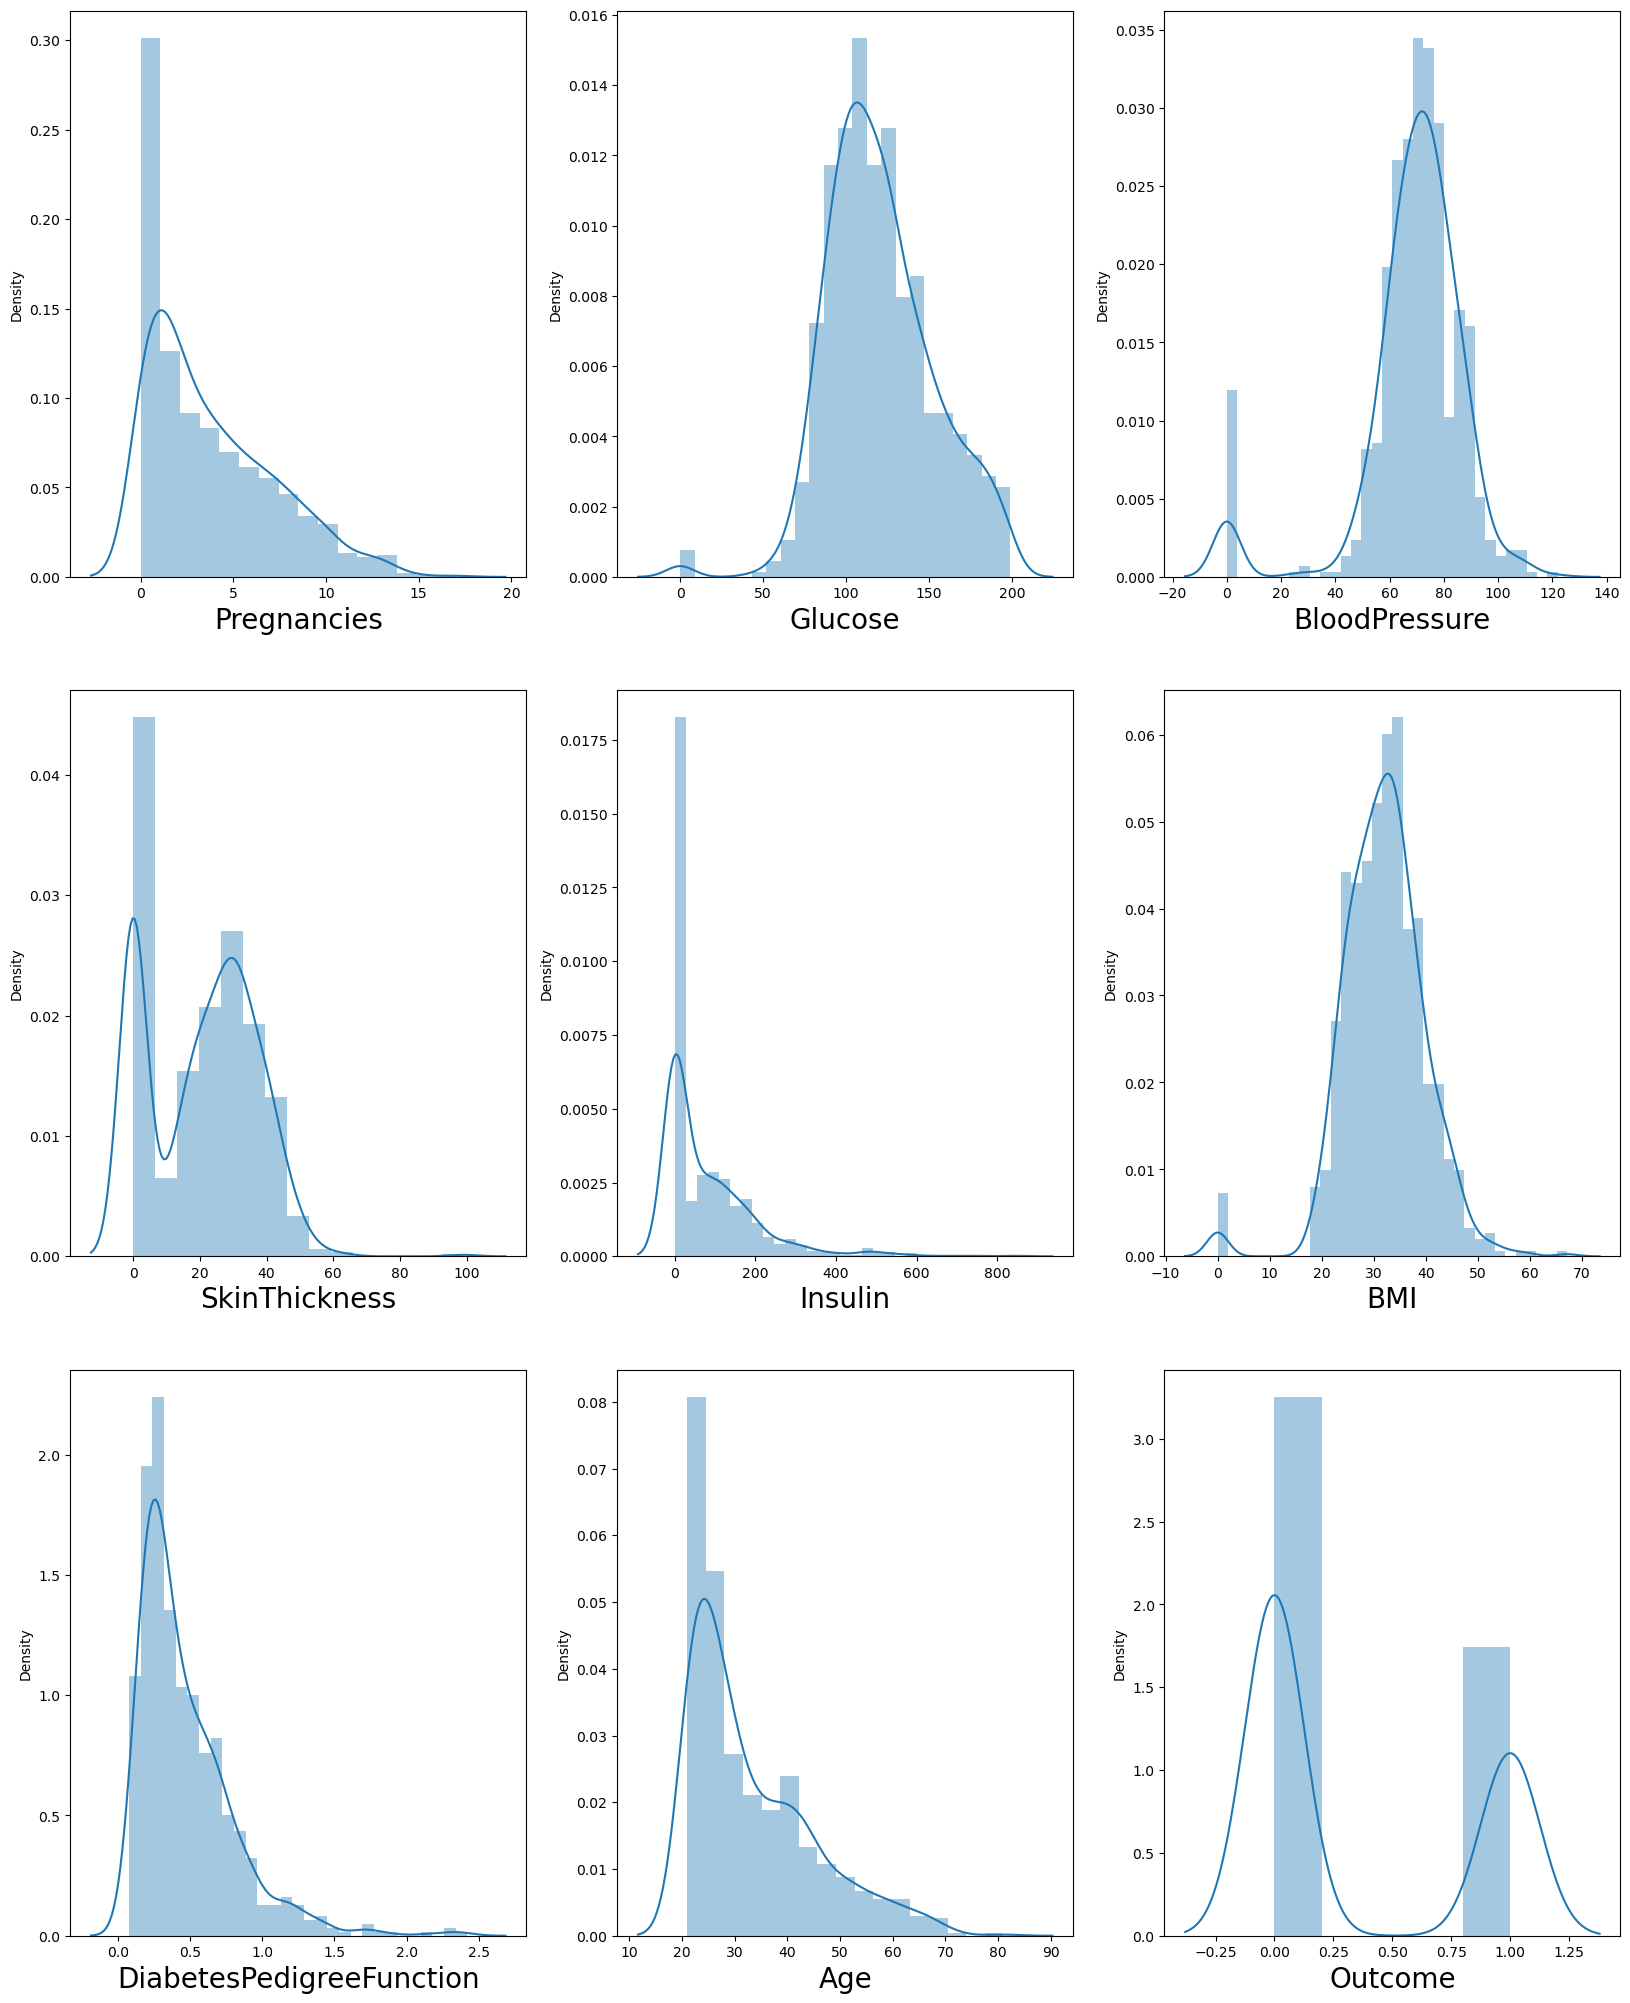

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# CHECKING THE OUTLAIERS

<AxesSubplot:>

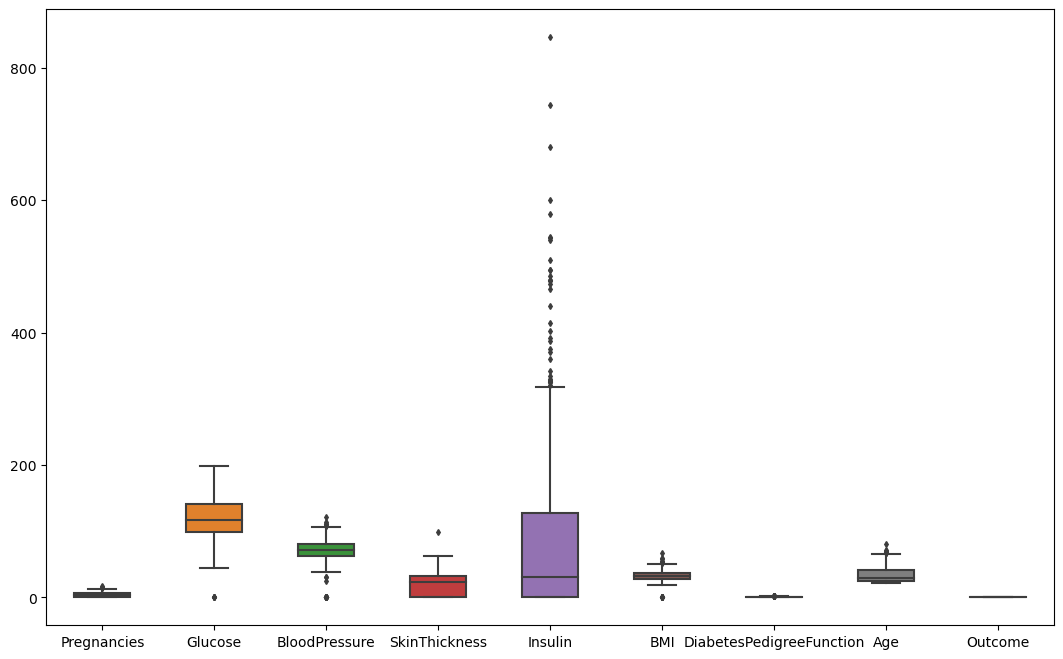

In [11]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

# REMOVING THE OUTLAIERS USING IQR METHOD

In [12]:
q1=df.Insulin.quantile(0.25)
q3=df.Insulin.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
df=df[(df.Insulin>lower_limit) & (df.Insulin<upper_limit)]

In [13]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
df=df[(df.Age>lower_limit) & (df.Age<upper_limit)]

In [14]:
q1=df.BloodPressure.quantile(0.25)
q3=df.BloodPressure.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
df=df[(df.BloodPressure>lower_limit) & (df.BloodPressure<upper_limit)]

In [15]:
q1=df.BMI.quantile(0.25)
q3=df.BMI.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
df=df[(df.BMI>lower_limit) & (df.BMI<upper_limit)]

# AFTER REMOVING THE OUTLAIERS OUR DATA LOOKS LIKE THIS

<AxesSubplot:>

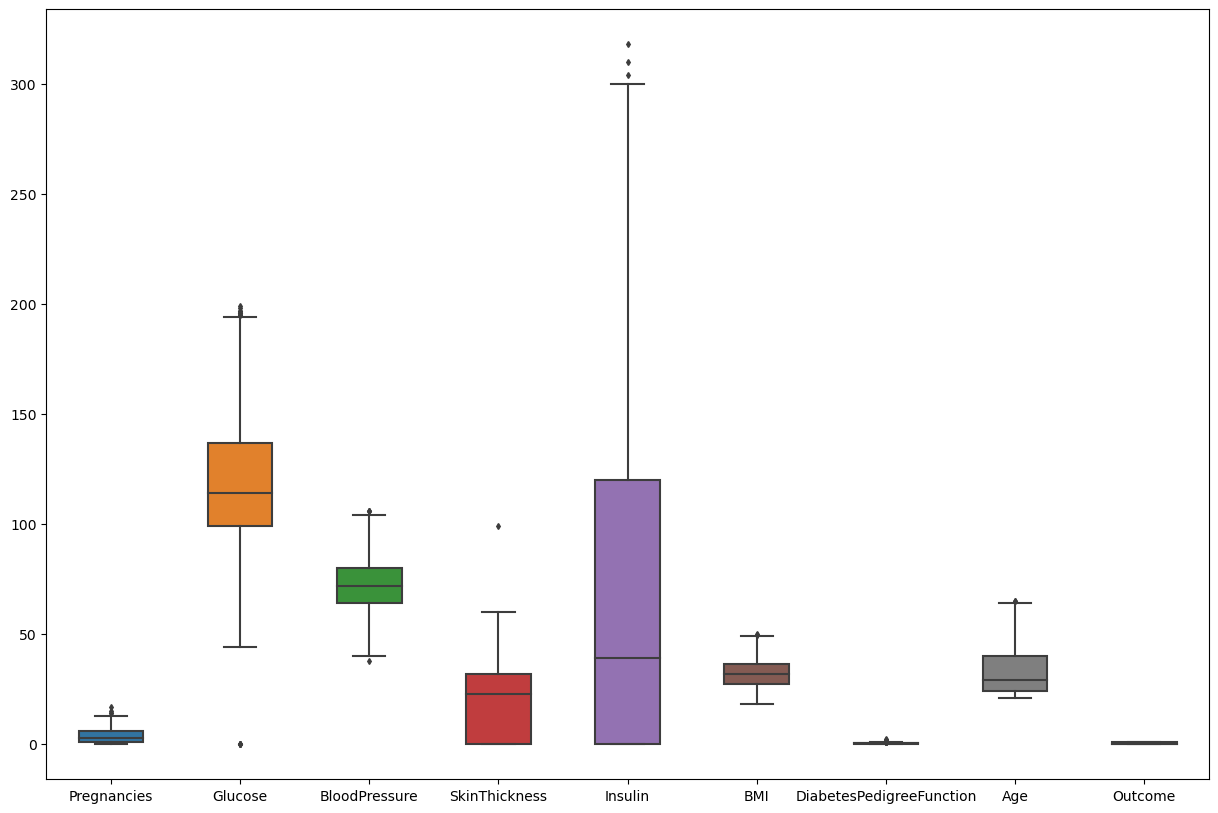

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

# let's see how data is distributed for every  column after removing the outlaiers

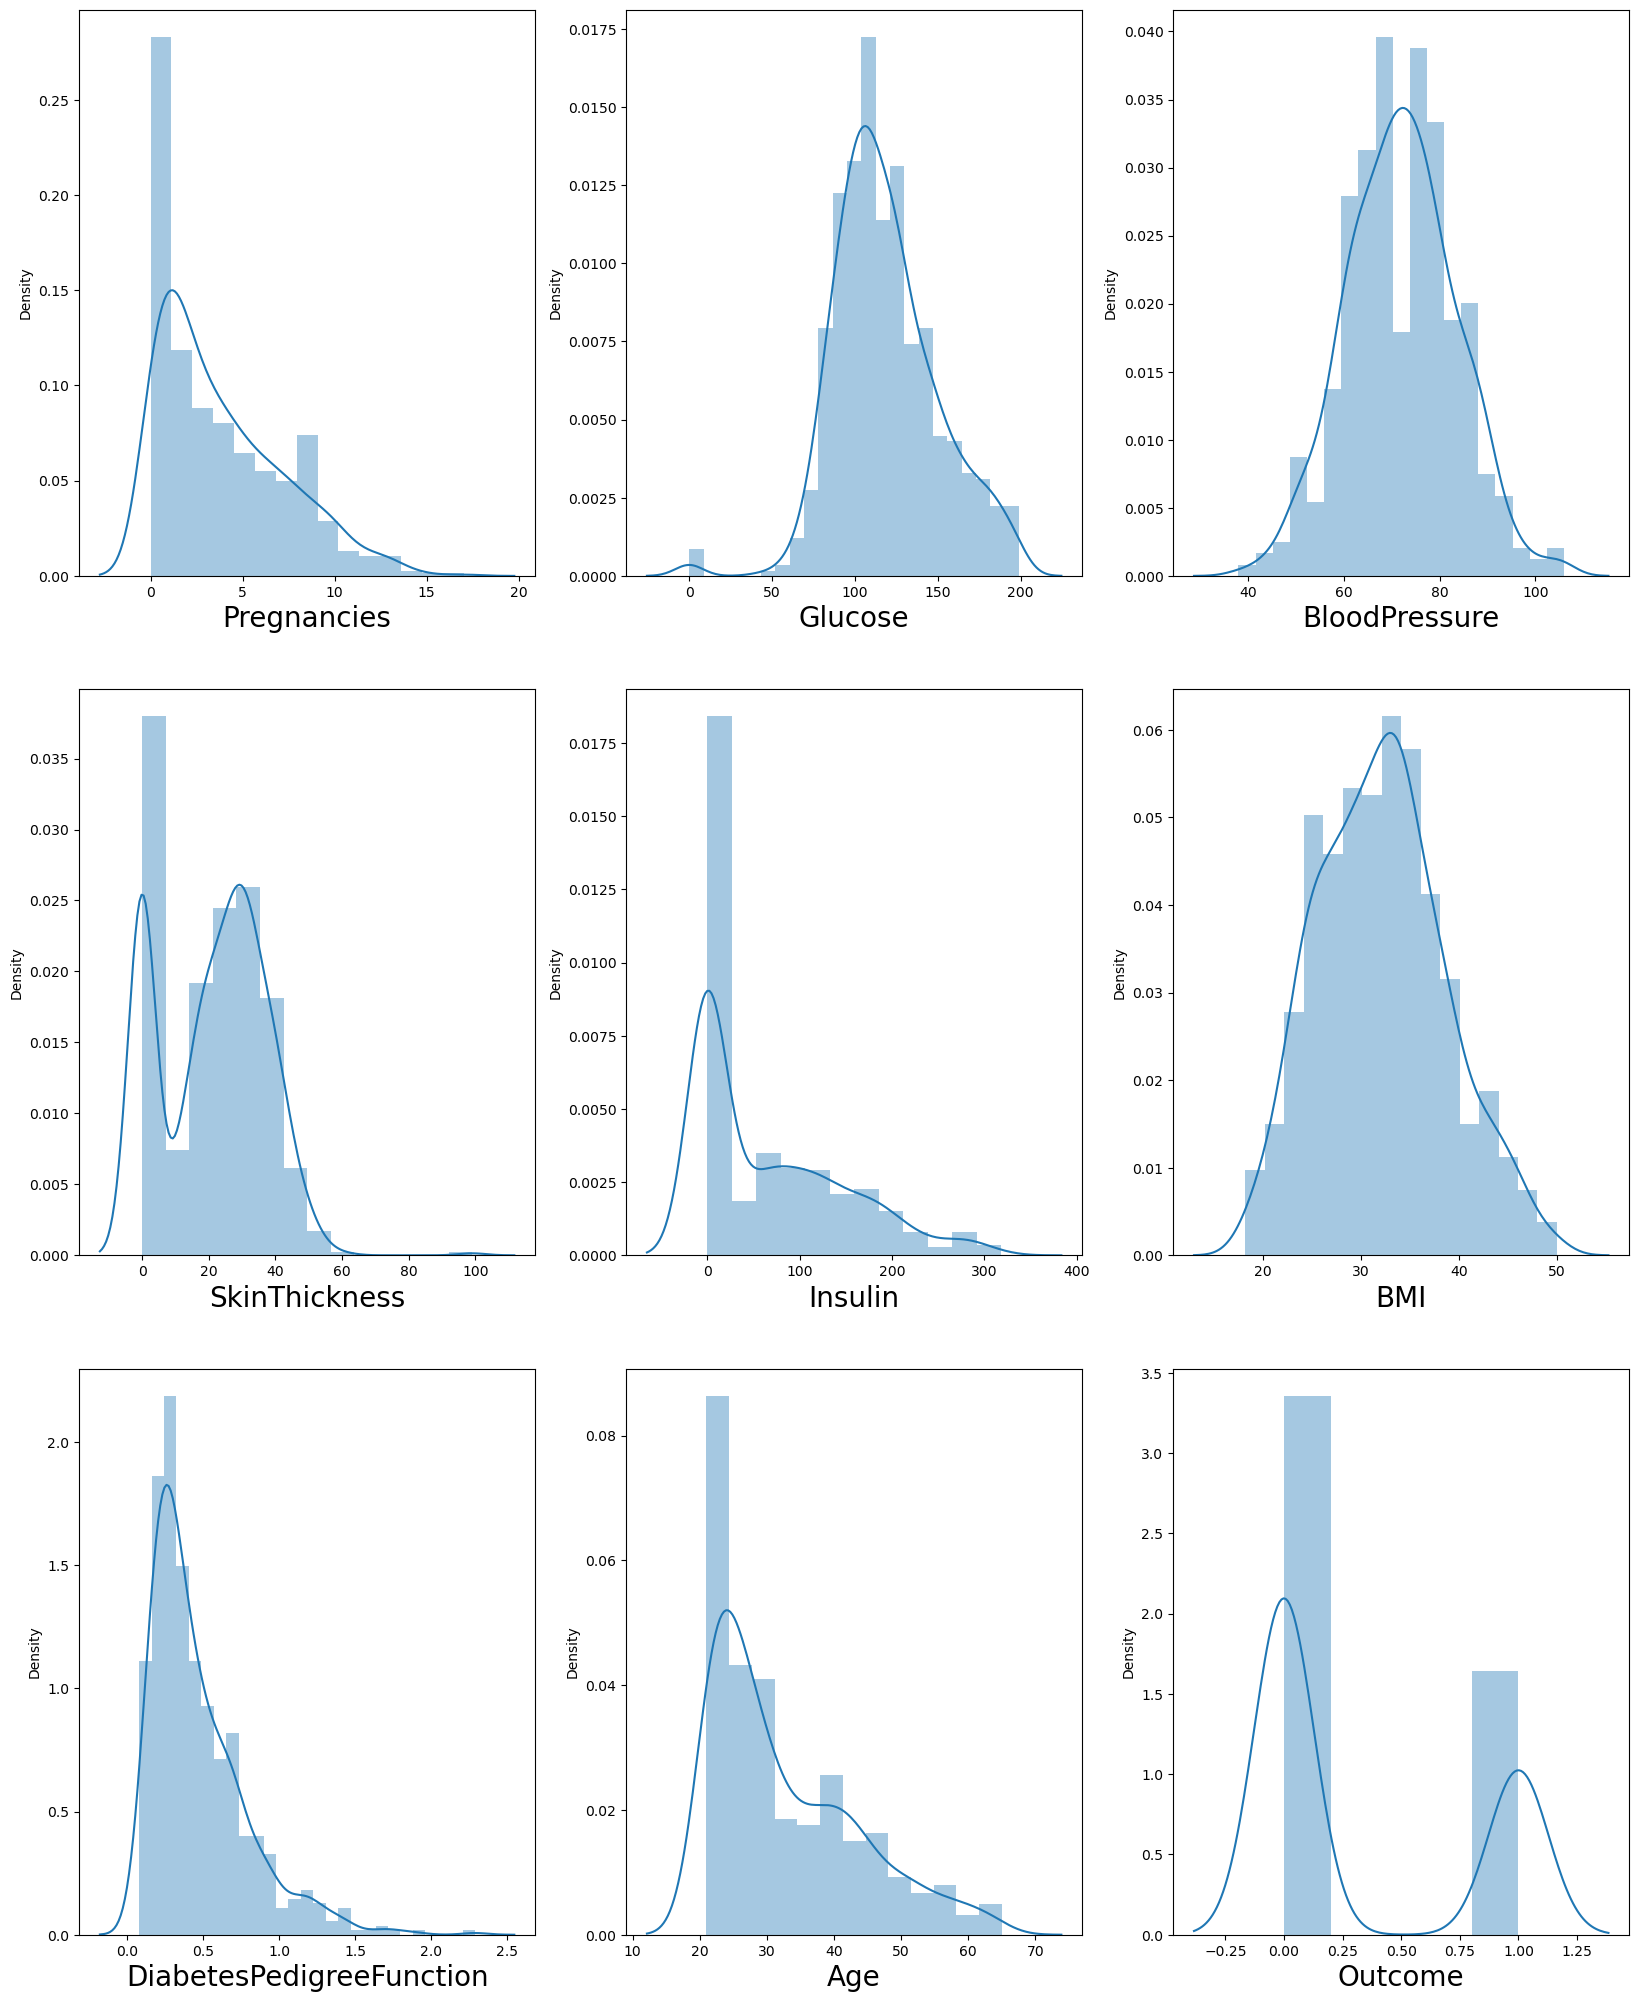

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# SOME VALUES ARE CONATINING ZEROS SO WE HAVE TO REPLACE WITH MEAN OR MEDIAN

In [18]:
# replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,3.841791,119.551236,71.976119,26.720143,98.512609,32.104478,0.466893,32.679104,0.328358
std,3.370768,29.452705,11.364830,9.477526,57.221987,6.440149,0.316265,10.858239,0.469967
min,0.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.086567,66.670149,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,66.670149,32.000000,0.372500,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,36.275000,0.613750,40.000000,1.000000
max,17.000000,199.000000,106.000000,99.000000,318.000000,50.000000,2.288000,65.000000,1.000000


In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.144111,0.206080,0.033769,-0.036672,0.038469,-0.011854,0.579274,0.239486
Glucose,0.144111,1.000000,0.229196,0.130560,0.339386,0.215630,0.097576,0.277084,0.488767
BloodPressure,0.206080,0.229196,1.000000,0.154562,0.005754,0.297498,0.003130,0.340894,0.173585
SkinThickness,0.033769,0.130560,0.154562,1.000000,0.248542,0.543080,0.103034,0.067366,0.171247
Insulin,-0.036672,0.339386,0.005754,0.248542,1.000000,0.222317,0.179031,0.019890,0.183904
BMI,0.038469,0.215630,0.297498,0.543080,0.222317,1.000000,0.142696,0.074996,0.285858
DiabetesPedigreeFunction,-0.011854,0.097576,0.003130,0.103034,0.179031,0.142696,1.000000,0.053207,0.197581
Age,0.579274,0.277084,0.340894,0.067366,0.019890,0.074996,0.053207,1.000000,0.269953
Outcome,0.239486,0.488767,0.173585,0.171247,0.183904,0.285858,0.197581,0.269953,1.000000


In [21]:
df.corr()['Outcome']

Pregnancies                 0.239486
Glucose                     0.488767
BloodPressure               0.173585
SkinThickness               0.171247
Insulin                     0.183904
BMI                         0.285858
DiabetesPedigreeFunction    0.197581
Age                         0.269953
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

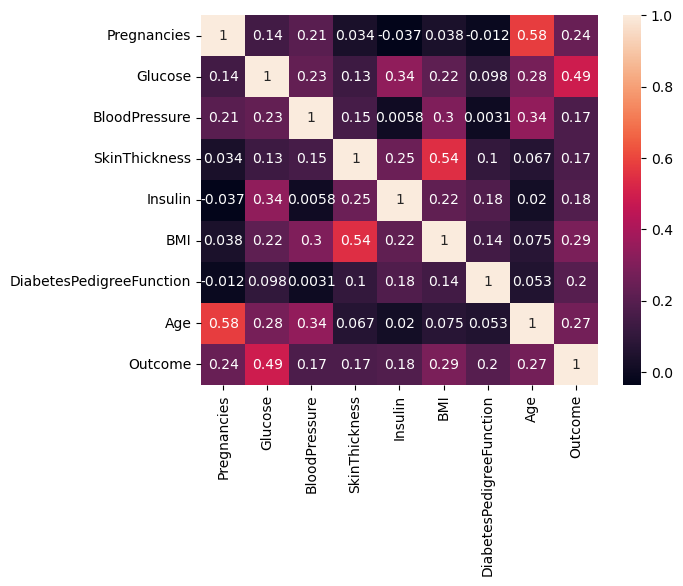

In [22]:
sns.heatmap(df.corr(),annot=True)

# lets see how the independent variables are distributed for target colum

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


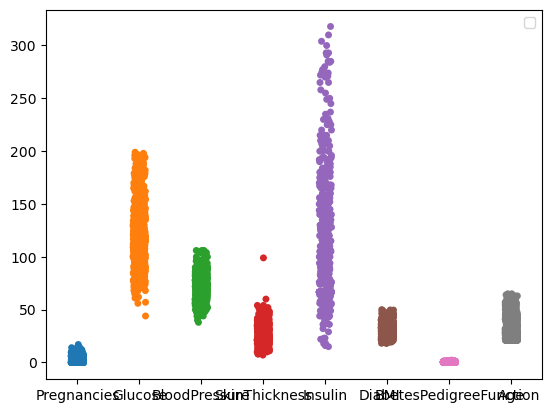

In [23]:
# plt.figure(figsize=(10,8), facecolor='white')
sns.stripplot(data=df.drop("Outcome", axis=1))
plt.legend()
plt.show()

# Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

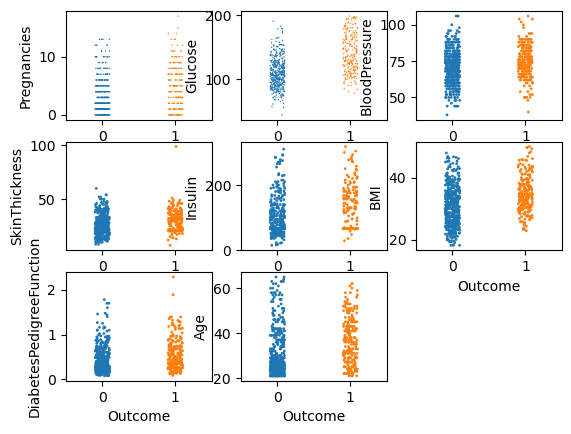

In [24]:
plt.subplot(331)
sns.stripplot(data=df,x='Outcome',y='Pregnancies',size=1) 
plt.subplot(332)
sns.stripplot(data=df,x='Outcome',y='Glucose',size=1)
plt.subplot(333)
sns.stripplot(data=df,x='Outcome',y='BloodPressure',size=2)
plt.subplot(334)
sns.stripplot(data=df,x='Outcome',y='SkinThickness',size=2)
plt.subplot(335)
sns.stripplot(data=df,x='Outcome',y='Insulin',size=2)
plt.subplot(336)
sns.stripplot(data=df,x='Outcome',y='BMI',size=2)
plt.subplot(337)
sns.stripplot(data=df,x='Outcome',y='DiabetesPedigreeFunction',size=2)
plt.subplot(338)
sns.stripplot(data=df,x='Outcome',y='Age',size=2)

# now scale the data

In [25]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [26]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35.000000,66.670149,33.6,0.627,50
1,1,85.0,66,29.000000,66.670149,26.6,0.351,31
2,8,183.0,64,21.086567,66.670149,23.3,0.672,32
3,1,89.0,66,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70,27.000000,66.670149,36.8,0.340,27
765,5,121.0,72,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60,21.086567,66.670149,30.1,0.349,47


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X)
#x_test=sc.transform(x_test)

In [28]:
x_scaled

array([[ 6.40750508e-01,  9.66635075e-01,  2.10284162e-03, ...,
         2.32392074e-01,  5.06623336e-01,  1.59637634e+00],
       [-8.43699147e-01, -1.17398553e+00, -5.26236116e-01, ...,
        -8.55351268e-01, -3.66715348e-01, -1.54754277e-01],
       [ 1.23453037e+00,  2.15586875e+00, -7.02349103e-01, ...,
        -1.36814456e+00,  6.49015512e-01, -6.25895077e-02],
       ...,
       [ 3.43860577e-01,  4.92262431e-02,  2.10284162e-03, ...,
        -9.17508030e-01, -7.02128030e-01, -2.46919047e-01],
       [-8.43699147e-01,  2.19116768e-01, -1.05457507e+00, ...,
        -3.11479597e-01, -3.73043889e-01,  1.31988204e+00],
       [-8.43699147e-01, -9.02160694e-01, -1.74010144e-01, ...,
        -2.64862025e-01, -4.80629089e-01, -8.92072434e-01]])

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.513400,Pregnancies
1,1.278791,Glucose
2,1.264730,BloodPressure
3,1.458160,SkinThickness
4,1.238716,Insulin
5,1.575755,BMI
6,1.052020,DiabetesPedigreeFunction
7,1.709112,Age


# All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.23,random_state=0)

In [33]:
len(x_train),len(x_test)

(515, 155)

In [34]:
len(y_train),len(y_test)

(515, 155)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [39]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("training score:",classifier.score(x_train,y_train))
print("testing score:",accuracy_score(y_test,y_pred))

training score: 0.7961165048543689
testing score: 0.7354838709677419


# Confusion Matrix

In [40]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[83, 20],
       [21, 31]], dtype=int64)

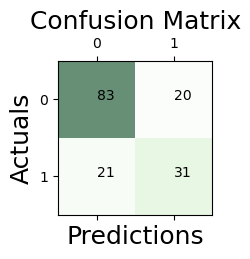

In [41]:
fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(conf_mat,cmap=plt.cm.Greens,alpha=0.6) #alpha for color
for i in range(conf_mat.shape[0]): # store i value of conusion_matrix of 0 index i.e 81,17
    for j in range(conf_mat.shape[1]):  # store j value of conusion_matrix of 1 index i.e 81,17
        ax.text(x=j, y=i,s=conf_mat[i, j])
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###or 
#cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
#plt.figure(figsize=(2,2))
#sns.heatmap(cm,annot=True)
#plt.xlabel("Predicted")
#plt.ylabel("Truth")###

# Classification Report of model

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       103
           1       0.61      0.60      0.60        52

    accuracy                           0.74       155
   macro avg       0.70      0.70      0.70       155
weighted avg       0.73      0.74      0.73       155



In [43]:
de=DecisionTreeClassifier()
de.fit(x_train,y_train)
y_pred=de.predict(x_test)
print("training score:",de.score(x_train,y_train))
print("testing score:",accuracy_score(y_test,y_pred))

training score: 1.0
testing score: 0.6903225806451613


In [44]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("training score:",rf.score(x_train,y_train))
print("testing score:",accuracy_score(y_test,y_pred))

training score: 1.0
testing score: 0.7548387096774194


In [45]:
s=SVC()
s.fit(x_train,y_train)
y_pred=s.predict(x_test)
print("training score:",s.score(x_train,y_train)*100)
print("testing score:",accuracy_score(y_test,y_pred)*100)

training score: 84.27184466019418
testing score: 75.48387096774194


In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("training score:",knn.score(x_train,y_train)*100)
print("testing score:",accuracy_score(y_test,y_pred)*100)

training score: 82.52427184466019
testing score: 72.90322580645162


# Making a prediction system

In [47]:
print(classifier.predict(sc.transform([[6,148.0,72,35.0,64.29003,33.6,0.627,50]])))

[1]


In [48]:
f=classifier.predict(sc.transform([[1,85.0,66,29.000000,66.670149,26.6,0.351,31]]))

In [49]:
if f==0:
    print("not a diabetic")
else:
    print("diabetic")

not a diabetic


In [ ]:
df.head(2)

In [50]:
input_data = (1,85.0,66,29.000000,66.670149,26.6,0.351,31)

# changing data to numpy array 
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)


# standarize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

[[-0.84369915 -1.17398553 -0.52623612  0.24073379 -0.5568882  -0.85535127
  -0.36671535 -0.15475428]]


In [52]:
result = classifier.predict(std_data)
print("The prediction is : ",result)

if (result[0] == 0):
  print("The person is not Diabetic")
else:
  print("The person is Diabetic") 

The prediction is :  [0]
The person is not Diabetic


In [ ]:
sd

In [53]:
import pickle

In [54]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))